# Nuages de mots

## Imports et stopwords

In [1]:
from collections import Counter
from wordcloud import WordCloud
import os
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from IPython.display import Image

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [2]:
# Stopwords (Idem que dans s1)
sw = stopwords.words("french")
sw += ["les", "plus", "cette", "fait", "faire", "être", "deux", "comme", "dont", "tout",
       "ils", "bien", "sans", "peut", "tous", "après", "ainsi", "donc", "cet", "sous",
       "celle", "entre", "encore", "toutes", "pendant", "moins", "dire", "cela", "non",
       "faut", "trois", "aussi", "dit", "avoir", "doit", "contre", "depuis", "autres",
       "van", "het", "autre", "jusqu", "ville"]
sw = set(sw)


## Créer un fichier contenant le texte de tous les bulletins d'une année donnée

In [4]:
# Choisir une année
year = 1847

In [5]:
# Lister les fichiers de cette année
data_path = '../data'
txt_path = '../data/txt'
txts = [f for f in os.listdir(txt_path) if os.path.isfile(os.path.join(txt_path, f)) and str(year) in f]
txts

['Bxl_1847_Tome_I1_Part_2.txt',
 'Bxl_1847_Tome_I1_Part_3.txt',
 'Bxl_1847_Tome_I1_Part_4.txt',
 'Bxl_1847_Tome_I1_Part_5.txt']

In [6]:
# Stocker le contenu de ces fichiers dans une liste
content_list = []
for txt in txts:
    with open(os.path.join(txt_path, txt), 'r') as f:
        content_list.append(f.read())

In [7]:
# Compter le nombre d'éléments (=fichiers) dans la liste
len(content_list)

4

In [8]:
# Imprimer les 200 premiers caractères du contenu du premier fichier
content_list[0][:200]

"B Les bâtimens appartenant à l'Etat, qui sont employés pour des casernes\nou des écuries militaires, seront cédés à cet effet aux administrations locales,\nà charge de les entretenir cri bon étal et d e"

In [10]:
# Ecrire tout le contenu dans un fichier temporaire
temp_path = '../data/tmp'
if not os.path.exists(temp_path):
    os.mkdir(temp_path)
with open(os.path.join(temp_path, f'{year}.txt'), 'w') as f:
    f.write(' '.join(content_list))

In [9]:
# Imprimer le contenu du fichier et constater les "déchets"
with open(os.path.join(temp_path, f'{year}.txt'), 'r') as f:
    before = f.read()

before[:500]

## Nettoyer le fichier à l'aide d'une fonction de nettoyage

### Créer la fonction de nettoyage (à adapter)

In [11]:
def clean_text(year, folder=None):
    if folder is None:
        input_path = f"{year}.txt"
        output_path = f"{year}_clean.txt"
    else:
        input_path = f"{folder}/{year}.txt"
        output_path = f"{folder}/{year}_clean.txt"
    output = open(output_path, "w", encoding='utf-8')
    with open(input_path, encoding='utf-8') as f:
        text = f.read()
        words = nltk.wordpunct_tokenize(text)
        kept = [w.lower() for w in words if len(w) > 2 and w.isalpha() and w.lower() not in sw]
        kept_string = " ".join(kept)
        output.write(kept_string)
    return f'Output has been written in {output_path}!'

### Appliquer la fonction sur le fichier complet de l'année

In [12]:
clean_text(year, folder=temp_path)

'Output has been written in ../data/tmp/1847_clean.txt!'

In [13]:
# Vérifier le résultat
with open(os.path.join(temp_path, f'{year}_clean.txt'), 'r') as f:
    after = f.read()

after[:500]

'bâtimens appartenant etat employés casernes écuries militaires cédés effet administrations locales charge entretenir cri bon étal employer aucun usage celui vient parlé sons disons législateur suivre esprit déeret voulait décret villes fournissent logement troupes uniquement casernes cédées effet lout veut raisonnablement vouloir arrêté combinés mot décret décidait villes logeraient troupes bâtimens cédés autrement législateur décret yeux entendu méconnaitre abroger principe justice équité consa'

## Nuage de mots

### Afficher les termes les plus fréquents


In [14]:
frequencies = Counter(after.split())
print(frequencies.most_common(10))

[('rue', 678), ('conseil', 592), ('section', 406), ('bruxelles', 368), ('place', 306), ('rapport', 285), ('marché', 267), ('question', 266), ('gouvernement', 266), ('royale', 260)]


### Créer, stocker et afficher le nuage de mots

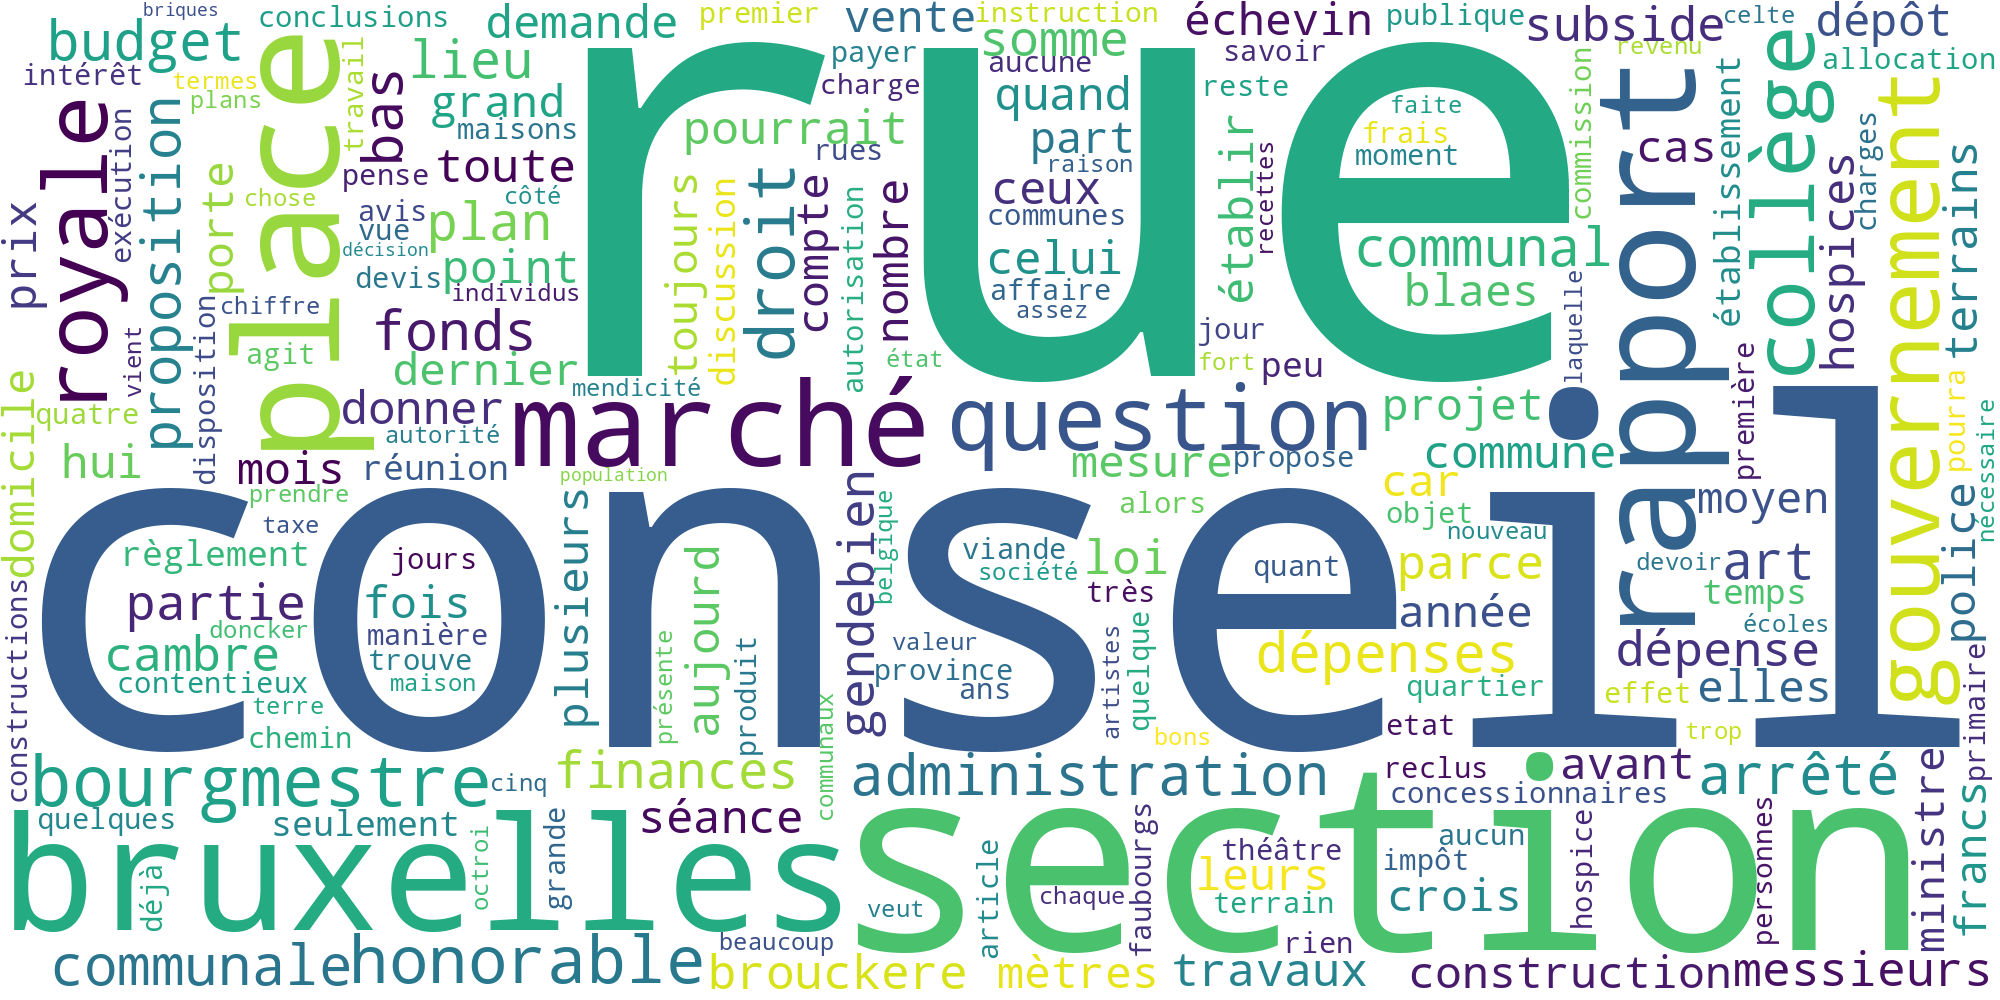

In [15]:
cloud = WordCloud(width=2000, height=1000, background_color='white').generate_from_frequencies(frequencies)
cloud.to_file(os.path.join(temp_path, f"{year}.png"))
Image(filename=os.path.join(temp_path, f"{year}.png"))